In [1]:
import pickle
import os
from quchem_ibm.Qiskit_Chemistry import *
from quchem_ibm.IBM_experiment_functions import *

In [2]:
fci_energy=-7.971184315565538
print('FCI = ', fci_energy)

FCI =  -7.971184315565542


In [3]:
# LCU results
base_dir = os.getcwd()
LCU_dir = os.path.join(base_dir, 'LCU')
data_dir = os.path.join(LCU_dir, 'Data')
result_dir = os.path.join(data_dir, 'state_vector_simulator')
output_file = os.path.join(result_dir, 'molecule=LiH___n_shots=1___method=LCU___time=2020Oct01-164725407693.pickle')
with open(output_file, 'rb') as handle:
    output_data_LCU = pickle.load(handle)


In [4]:
list(output_data_LCU.keys())

['start_time',
 'end_time',
 'method',
 'I_term',
 'experiment_dict',
 'state_vector_list']

In [5]:
i=4
print(output_data_LCU['state_vector_list'][i].data.shape)
n_shots = 5
output_data_LCU['state_vector_list'][i].sample_counts(n_shots)

(32768,)


{'000000001010101': 1,
 '001000001010101': 1,
 '101000001010101': 1,
 '101000001111111': 1,
 '110000001010101': 1}

In [6]:
output_data_LCU['experiment_dict'][4].keys()

dict_keys(['circuit', 'gamma_l', 'Pn', 'N_ancilla'])

In [7]:
from tqdm.notebook import tqdm

In [8]:
E_sim=[output_data_LCU['I_term']]
n_shots=100_000
for index, exp_dict in tqdm(enumerate(output_data_LCU['experiment_dict']), ascii=True, desc='Performing_VQE'):
    
    final_state=output_data_LCU['state_vector_list'][index]
#     final_state = Statevector(final_state.data[::-1]) # reversing state!
    
    if 'Pn' in exp_dict.keys():
        Pn = exp_dict['Pn']
        gamma_l = exp_dict['gamma_l']
        N_ancilla = exp_dict['N_ancilla']
        
        simulated_dict =final_state.sample_counts(n_shots)
        
        post_selected_dict_sim = Get_post_selection_counts_DICT_LCU(simulated_dict, N_ancilla)
        exp_val_sim = calc_exp_pauliword(post_selected_dict_sim, Pn)
        E_sim.append(exp_val_sim * gamma_l)
    else:
        qubitOp = exp_dict['qubitOp']
        coeff = exp_dict['coeff']
        
        simulated_dict = final_state.sample_counts(n_shots)
        exp_val = calc_exp_pauliword(simulated_dict, qubitOp)
        E_sim.append(exp_val * coeff)
sum(E_sim)

(-7.970842839709595+0j)

In [9]:
# STANDARD results

base_dir = os.getcwd()
standard_dir = os.path.join(base_dir, 'standard')
data_dir = os.path.join(standard_dir, 'Data')
result_dir = os.path.join(data_dir, 'state_vector_simulator')
output_file = os.path.join(result_dir, 'molecule=LiH___n_shots=1___method=standard_VQE___time=2020Oct01-181242726937.pickle')
with open(output_file, 'rb') as handle:
    output_data_STANDARD = pickle.load(handle)


In [10]:
E_sim=[output_data_STANDARD['I_term']]
n_shots=100_000
for index, exp_dict in tqdm(enumerate(output_data_STANDARD['experiment_dict']), ascii=True, desc='Performing_VQE'):
    
    final_state=output_data_STANDARD['state_vector_list'][index]

    qubitOp = exp_dict['qubitOp']
    coeff = exp_dict['coeff']

    simulated_dict = final_state.sample_counts(n_shots)
    exp_val = calc_exp_pauliword(simulated_dict, qubitOp)
    E_sim.append(exp_val * coeff)
sum(E_sim)

(-7.972156986721278+0j)

In [11]:
# seq rot results
base_dir = os.getcwd()
LCU_dir = os.path.join(base_dir, 'seq_rot')
data_dir = os.path.join(LCU_dir, 'Data')
result_dir = os.path.join(data_dir, 'state_vector_simulator')
output_file = os.path.join(result_dir, 'molecule=LiH___n_shots=1___method=seq_rot_VQE___time=2020Oct01-164012108374.pickle')
with open(output_file, 'rb') as handle:
    output_data_SEQ_ROT = pickle.load(handle)


In [12]:
E_sim=[output_data_SEQ_ROT['I_term']]
n_shots=100_000
for index, exp_dict in tqdm(enumerate(output_data_SEQ_ROT['experiment_dict']), ascii=True, desc='Performing_VQE'):
    
    final_state=output_data_SEQ_ROT['state_vector_list'][index]
    
    if 'Ps' in exp_dict.keys():
        Ps = exp_dict['Ps']
        gamma_l = exp_dict['gamma_l']
        
        simulated_dict =final_state.sample_counts(n_shots)
    
        exp_val_sim = calc_exp_pauliword(simulated_dict, Ps)
        E_sim.append(exp_val_sim * gamma_l)
    else:
        qubitOp = exp_dict['qubitOp']
        coeff = exp_dict['coeff']
        
        simulated_dict = final_state.sample_counts(n_shots)
        exp_val = calc_exp_pauliword(simulated_dict, qubitOp)
        E_sim.append(exp_val * coeff)
sum(E_sim)

(-7.970216047838908+0j)

In [13]:
from quchem_ibm.Experiments.Myriad.Scratch.Wavefunction_experiment import *

In [19]:
E_sim_LCU, T_meas, exp_record_LCU = Calc_E_M_LCU(output_data_LCU, 10_000)
E_sim_LCU

Performing_VQE: 102it [01:02,  1.64it/s]


(-7.962560597738191+0j)

In [15]:
E_sim_SEQ_ROT, T_meas, exp_record_SEQ_ROT = Calc_E_M_seq_rot(output_data_SEQ_ROT, 10_000)
E_sim_SEQ_ROT

Performing_VQE: 102it [00:06, 14.84it/s]


(-7.972327717041211+0j)

In [16]:
E_sim_STANDARD, T_meas, exp_record_STANDARD = Calc_E_M_STANDARD(output_data_STANDARD, 10_000)
E_sim_STANDARD

Performing_VQE: 630it [00:42, 14.97it/s]


(-7.972537799841618+0j)

In [17]:
dasdfds

NameError: name 'dasdfds' is not defined

https://qiskit.org/documentation/stubs/qiskit.quantum_info.partial_trace.html

In [25]:
def Calc_E_LCU(output_dict, n_shots):
    E_sim=[output_dict['I_term']]
    T_meas = 0
    for index, exp_dict in tqdm(enumerate(output_dict['experiment_dict']), ascii=True, desc='Performing_VQE'):

        final_state=output_dict['state_vector_list'][index]

        if 'Pn' in exp_dict.keys():
            Pn = exp_dict['Pn']
            gamma_l = exp_dict['gamma_l']
            N_ancilla = exp_dict['N_ancilla']

            simulated_dict =final_state.sample_counts(n_shots)

            post_selected_dict_sim = Get_post_selection_counts_DICT_LCU(simulated_dict, N_ancilla)
            exp_val_sim = calc_exp_pauliword(post_selected_dict_sim, Pn)
            E_sim.append(exp_val_sim * gamma_l)
            T_meas+= sum(post_selected_dict_sim.values())
        else:
            qubitOp = exp_dict['qubitOp']
            coeff = exp_dict['coeff']

            simulated_dict = final_state.sample_counts(n_shots)
            exp_val = calc_exp_pauliword(simulated_dict, qubitOp)
            E_sim.append(exp_val * coeff)
            T_meas+= sum(simulated_dict.values())
    return sum(E_sim), T_meas

In [ ]:
Calc_E_LCU(output_data_LCU, 10_000)

In [26]:
def Calc_E_STANDARD(output_dict, n_shots):
    E_sim=[output_dict['I_term']]
    T_meas = 0
    for index, exp_dict in tqdm(enumerate(output_dict['experiment_dict']), ascii=True, desc='Performing_VQE'):

        final_state=output_dict['state_vector_list'][index]

        qubitOp = exp_dict['qubitOp']
        coeff = exp_dict['coeff']

        simulated_dict = final_state.sample_counts(n_shots)
        exp_val = calc_exp_pauliword(simulated_dict, qubitOp)
        E_sim.append(exp_val * coeff)
        T_meas+= sum(simulated_dict.values())
        
    return sum(E_sim), T_meas

In [ ]:
Calc_E_STANDARD(output_data_STANDARD, 10_000)

In [27]:
def Calc_E_SEQ_ROT(output_dict, n_shots):
    E_sim=[output_dict['I_term']]
    T_meas = 0
    for index, exp_dict in tqdm(enumerate(output_dict['experiment_dict']), ascii=True, desc='Performing_VQE'):

        final_state=output_dict['state_vector_list'][index]

        if 'Ps' in exp_dict.keys():
            Ps = exp_dict['Ps']
            gamma_l = exp_dict['gamma_l']

            simulated_dict =final_state.sample_counts(n_shots)
            exp_val_sim = calc_exp_pauliword(simulated_dict, Ps)
            E_sim.append(exp_val_sim * gamma_l)
            T_meas+= sum(post_selected_dict_sim.values())
        else:
            qubitOp = exp_dict['qubitOp']
            coeff = exp_dict['coeff']

            simulated_dict = final_state.sample_counts(n_shots)
            exp_val = calc_exp_pauliword(simulated_dict, qubitOp)
            E_sim.append(exp_val * coeff)
            T_meas+= sum(simulated_dict.values())
    return sum(E_sim), T_meas

In [22]:
Calc_E_SEQ_ROT(output_data_SEQ_ROT, 10_000)

Performing_VQE: 102it [00:07, 13.77it/s]


((-7.970364702394112+0j), 3874054)

LCM(630, 102) = 10710

In [23]:
len(range(10710, 10710*11,10710*2))

5

In [28]:
N_repeats=5

shot_list=range(6_747_300, 6_747_300*11,6747300*2)# 5 runs
# shot_list=range(6747300, 6747300*101,6747300*2)# 50 runs

LCU_E_data = np.zeros((len(shot_list), N_repeats))
LCU_M_data = np.zeros((len(shot_list), N_repeats))

SEQ_ROT_E_data = np.zeros((len(shot_list), N_repeats))
SEQ_ROT_M_data = np.zeros((len(shot_list), N_repeats))

STANDARD_E_data = np.zeros((len(shot_list), N_repeats))
STANDARD_M_data = np.zeros((len(shot_list), N_repeats))

for index, n_shots in enumerate(shot_list): 
    for j in range(N_repeats):
        
        n_shots_UP = int(n_shots/102)
        n_shots_STANDARD=int(n_shots/630)
        
        E_LCU, M_LCU = Calc_E_LCU(output_data_LCU, n_shots_UP)
        LCU_E_data[index, j]=E_LCU
        LCU_M_data[index, j]=M_LCU
        
        E_SEQ_ROT, M_SEQ_ROT = Calc_E_SEQ_ROT(output_data_SEQ_ROT, n_shots_UP)
        SEQ_ROT_E_data[index, j]=E_SEQ_ROT
        SEQ_ROT_M_data[index, j]=M_SEQ_ROT
        
        E_STANDARD, M_STANDARD = Calc_E_STANDARD(output_data_STANDARD, n_shots_STANDARD)
        STANDARD_E_data[index, j]=E_STANDARD
        STANDARD_M_data[index, j]=M_STANDARD
        

Performing_VQE: 102it [01:23,  1.23it/s]
/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
Performing_VQE: 102it [00:22,  4.54it/s]
/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
Performing_VQE: 630it [00:44, 14.19it/s]
/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
Performing_VQE: 102it [01:21,  1.25it/s]
Performing_VQE: 102it [00:22,  4.51it/s]
Performing_VQE: 630it [00:45, 13.99it/s]
Performing_VQE: 102it [01:22,  1.24it/s]
Performing_VQE: 102it [00:22,  4.51it/s]
Performing_VQE: 630it [00:44, 14.19it/s]
Performing_VQE: 102it [01:21,  1.25it/s]
Performing_VQE: 102it [00:22,  4.57it/s]
Performing_VQE: 630it [00:43, 14.37it/s]
P

In [30]:
E_av_LCU_list=[]
E_std_LCU_list=[]
M_av_LCU_list = []

E_av_SEQ_ROT_list=[]
E_std_SEQ_ROT_list=[]
M_av_SEQ_ROT_list = []

E_av_STANDARD_list=[]
E_std_STANDARD_list=[]
M_av_STANDARD_list = []

for row_index in range(LCU_E_data.shape[0]):
    
    ### LCU
    E_av_LCU = np.mean(LCU_E_data[row_index,:])
    standard_dev_LCU = np.std(LCU_E_data[row_index,:])
    
    M_av_LCU = np.mean(LCU_M_data[row_index,:])
    
    E_av_LCU_list.append(E_av_LCU)
    E_std_LCU_list.append(standard_dev_LCU)
    M_av_LCU_list.append(M_av_LCU)
    
    ### seq rot
    E_av_SEQ_ROT = np.mean(SEQ_ROT_E_data[row_index,:])
    standard_dev_SEQ_ROT = np.std(SEQ_ROT_E_data[row_index,:])
    
    M_av_SEQ_ROT = np.mean(SEQ_ROT_M_data[row_index,:])
    
    E_av_SEQ_ROT_list.append(E_av_SEQ_ROT)
    E_std_SEQ_ROT_list.append(standard_dev_SEQ_ROT)
    M_av_SEQ_ROT_list.append(M_av_SEQ_ROT)
    
    ### Standard
    E_av_STANDARD = np.mean(STANDARD_E_data[row_index,:])
    standard_dev_STANDARD = np.std(STANDARD_E_data[row_index,:])
    
    M_av_STANDARD = np.mean(STANDARD_M_data[row_index,:])
    
    E_av_STANDARD_list.append(E_av_STANDARD)
    E_std_STANDARD_list.append(standard_dev_STANDARD)
    M_av_STANDARD_list.append(M_av_STANDARD)

In [31]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


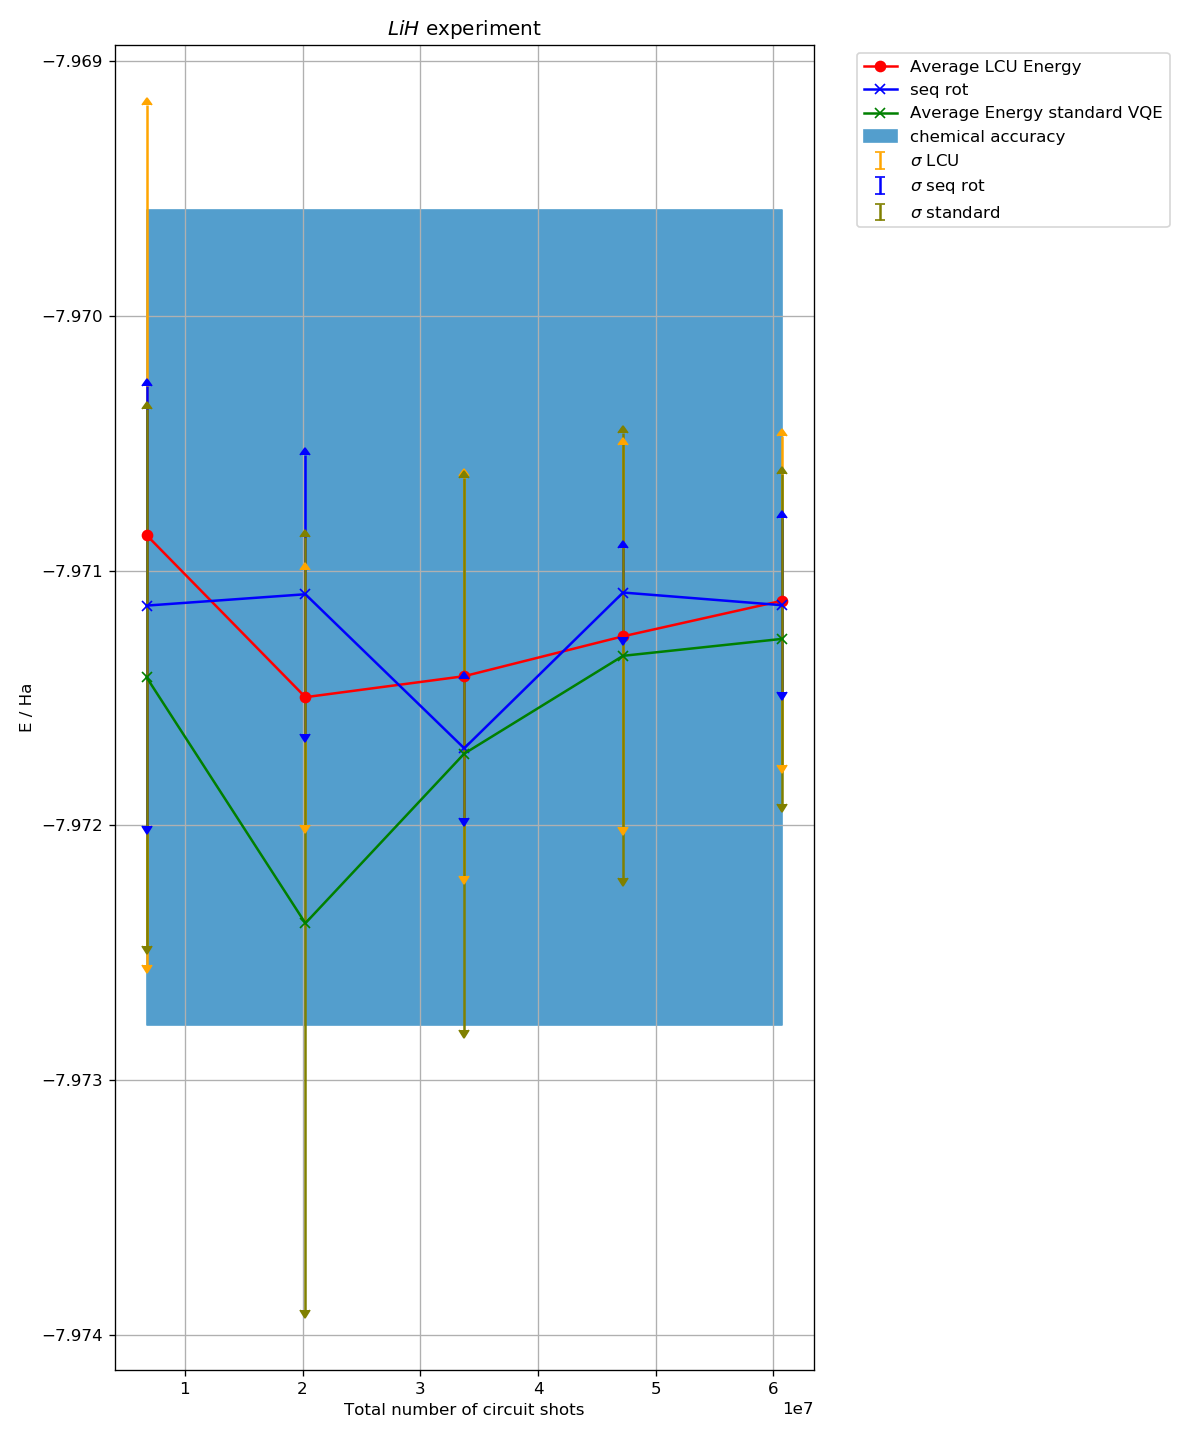

In [33]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,12))

## LCU
ax.plot(shot_list,E_av_LCU_list, color='red', label='Average LCU Energy', marker='o')
plt.errorbar(shot_list,E_av_LCU_list,yerr=E_std_LCU_list, linestyle="None", color='orange',
             uplims=True, lolims=True, label='$\sigma$ LCU')

## seq rot
ax.plot(shot_list,E_av_SEQ_ROT_list, color='b', label='seq rot', marker='x')
plt.errorbar(shot_list, E_av_SEQ_ROT_list,yerr=E_std_SEQ_ROT_list, linestyle="None", 
             color='b', uplims=True, lolims=True, label='$\sigma$ seq rot')

## STANDARD
ax.plot(shot_list,E_av_STANDARD_list, color='green', label='Average Energy standard VQE', marker='x')
plt.errorbar(M_av_STANDARD_list,E_av_STANDARD_list,yerr=E_std_STANDARD_list, linestyle="None", 
             color='olive', uplims=True, lolims=True, label='$\sigma$ standard')

plt.fill_between([min([*shot_list, *shot_list]), max([*M_av_LCU_list, *M_av_STANDARD_list])],
                 [fci_energy-1.6e-3, fci_energy-1.6e-3] ,
                 y2=[fci_energy+1.6e-3,fci_energy+1.6e-3],
                 color='#539ecd', 
                 label='chemical accuracy')


ax.set(xlabel='Total number of circuit shots', ylabel='E / Ha' ,title='$LiH$ experiment')
ax.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

file_name = 'LiH_wavefunction_analysis.jpeg'
plt.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')

In [ ]:
# %matplotlib notebook
# fig, ax = plt.subplots(figsize=(10,12))

# ## LCU
# ax.plot(M_av_LCU_list,E_av_LCU_list, color='red', label='LCU', marker='o')
# plt.errorbar(M_av_LCU_list,E_av_LCU_list,yerr=E_std_LCU_list, linestyle="None", color='orange')

# ## STANDARD
# ax.plot(M_av_STANDARD_list,E_av_STANDARD_list, color='green', label='Standard', marker='x')
# plt.errorbar(M_av_STANDARD_list,E_av_STANDARD_list,yerr=E_std_STANDARD_list, linestyle="None", color='olive')

# plt.fill_between([min([*M_av_LCU_list, *M_av_STANDARD_list]), max([*M_av_LCU_list, *M_av_STANDARD_list])],
#                  [fci_energy-1.6e-3, fci_energy-1.6e-3] ,
#                  y2=[fci_energy+1.6e-3,fci_energy+1.6e-3],
#                  color='#539ecd', 
#                  label='chemical accuracy')


# ax.set(xlabel='Total number of circuit shots', ylabel='E / Ha' ,title='$LiH$ experiment')
# ax.grid()
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.tight_layout()
# plt.show()

# # file_name = 'H2_run_1.jpeg'
# # plt.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')